# SVR

## `00 ` Import libraries 

In [1]:
import numpy as np
import pandas as pd
# visulaization
import matplotlib.pyplot as plt
import seaborn as sns

#check normality
from scipy.stats import shapiro
#for Normalization
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
#handling categorical feature
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
#spliting data
from sklearn.model_selection import train_test_split
#models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("house-prices/train.csv")
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## `01 ` Split Data 

In [3]:
from sklearn.model_selection import train_test_split
train_data, validation_data = train_test_split(df, test_size = 0.2, random_state = 42)

In [4]:
## separating the categorical features and numerical features
num_cols = list(set(df.select_dtypes(exclude=[object]).columns) - set(['Id', 'SalePrice']))
cat_cols = list(df.select_dtypes(include=[object]).columns) 
ordinal_cols = ['BsmtQual', 'LotShape', 'HeatingQC', 'BsmtFinType1',  'ExterQual', 
                 'KitchenQual', 'BsmtExposure', 'GarageFinish']
nominal_cols = ['HouseStyle', 'LotConfig', 'RoofStyle', 'GarageType', 'Exterior1st', 
                'Foundation', 'MSZoning', 'Exterior2nd', 'MasVnrType', 'Neighborhood'] 
len(num_cols)

36

## `02` EDA

In [ ]:
train_data.info()

### `2.1` Check Normality

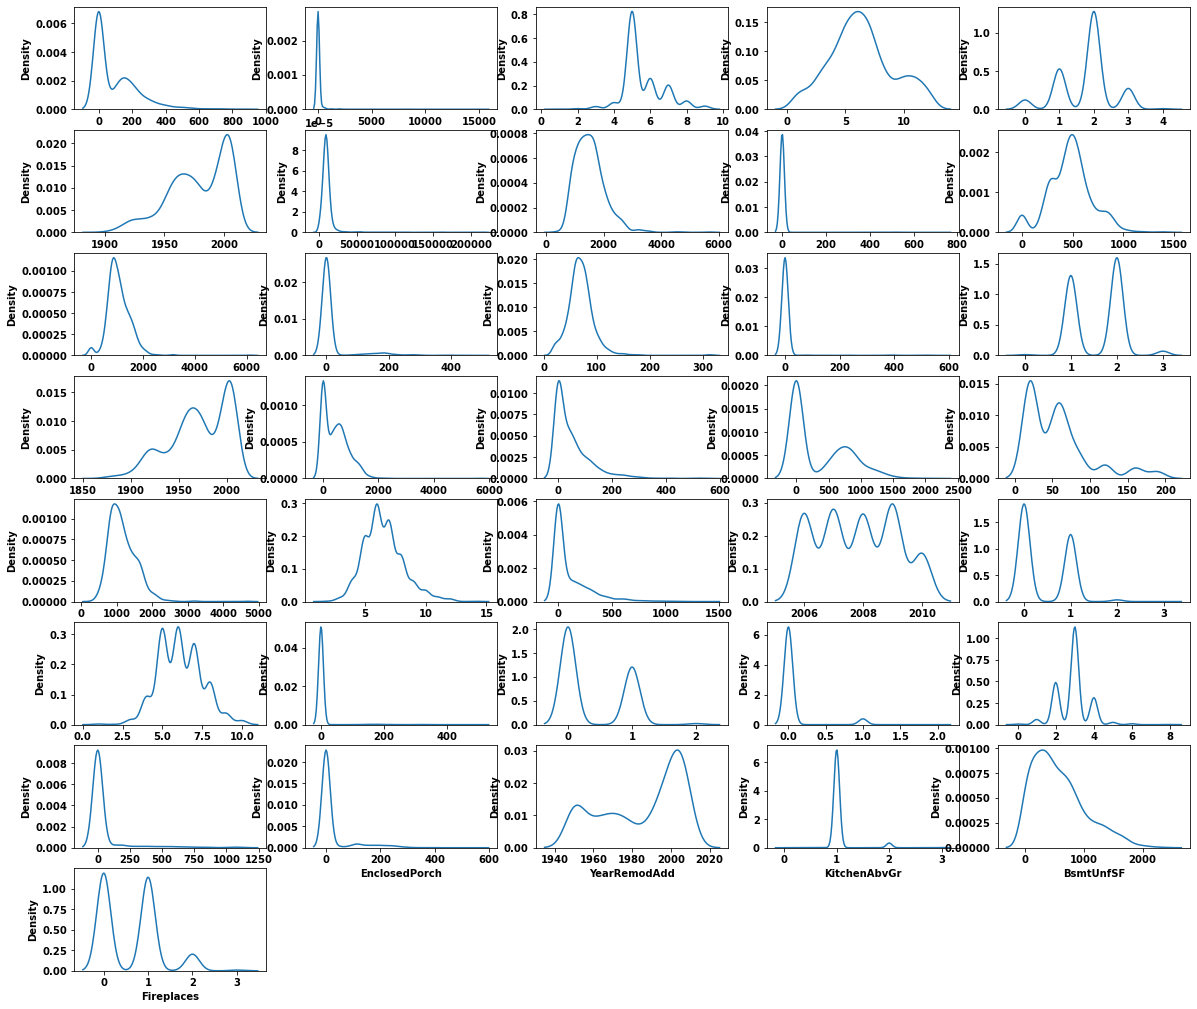

In [5]:

plt.figure(figsize=(20,20))
for i, col in enumerate(train_data[num_cols]):
    ax = plt.subplot(9, 5, i+1)
    sns.kdeplot(train_data[col], ax=ax)
plt.show()

### `2.2` Check Nulls

In [6]:
nulls_df = ((train_data.isnull().sum()/train_data.shape[0])*100).sort_values(ascending=False).reset_index().rename(columns = { 0 : "Nulls_Count"})
nulls_df[nulls_df['Nulls_Count'] > 0]


,index,Nulls_Count
0,PoolQC,99.486301
1,MiscFeature,96.061644
2,Alley,93.664384
3,Fence,80.051370
4,FireplaceQu,46.832192
5,LotFrontage,18.578767
6,GarageYrBlt,5.479452
7,GarageCond,5.479452
8,GarageType,5.479452
9,GarageFinish,5.479452


### `2.3` Check Duplicates

In [7]:
#check Duplicates
df.duplicated().sum()

0

### `2.4` Check Outliers

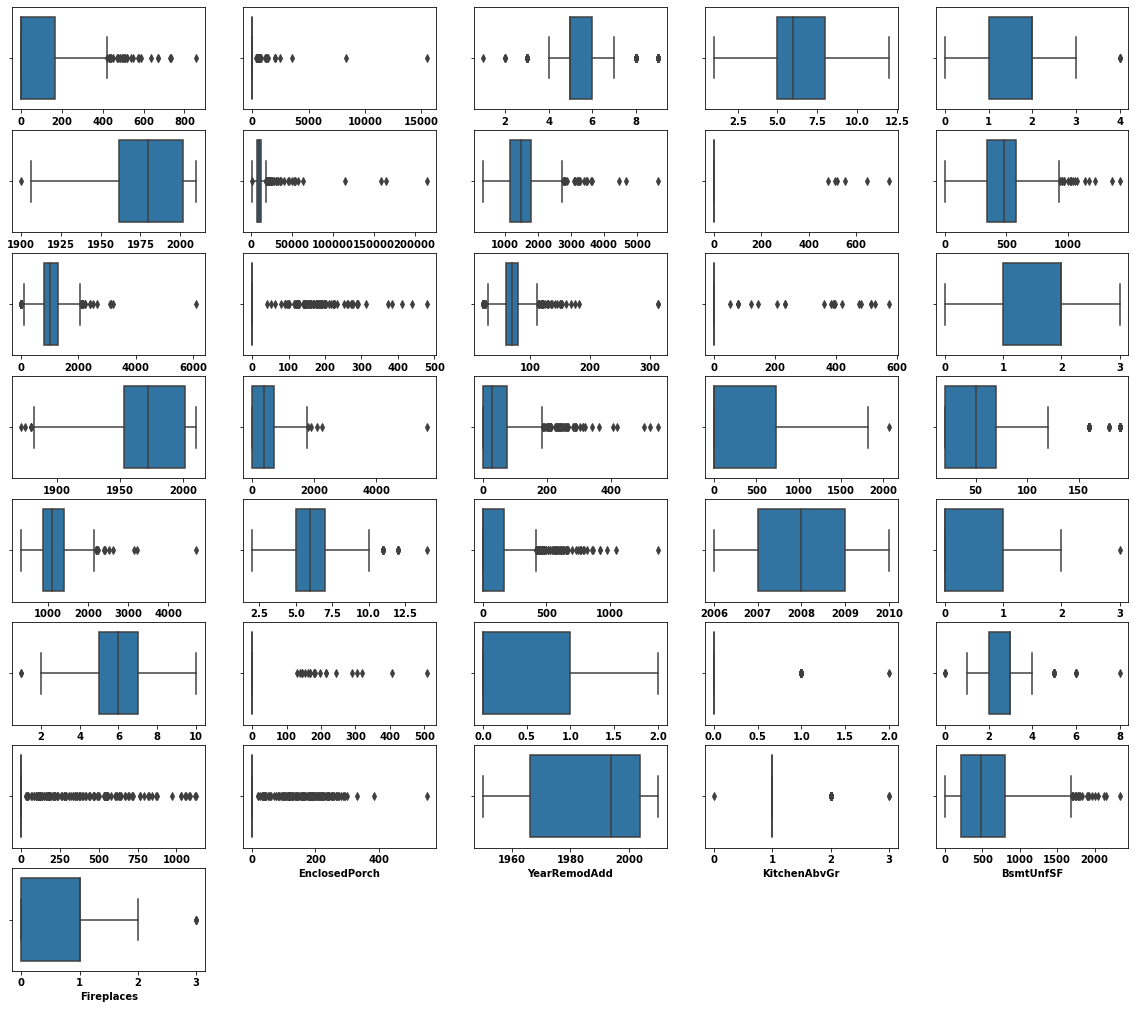

In [9]:
#Check Outliers
plt.figure(figsize=(20,20))
for i, col in enumerate(train_data[num_cols]):
    plt.subplot(9, 5, i+1)
    sns.boxplot(x = train_data[col]) 
plt.show()


### `2.5` Check Highly correlated features

<AxesSubplot:>

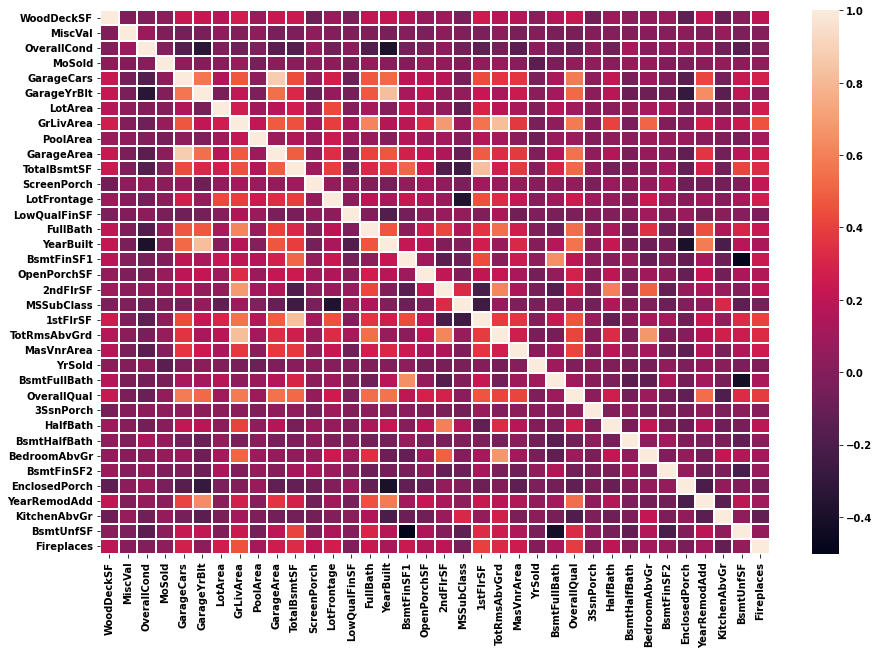

In [10]:
# making a heatmap to inspect the highly correlated features
import seaborn as sns
corr_matrix = train_data[num_cols].corr()
plt.subplots(figsize = (15, 10))
sns.heatmap(corr_matrix, 
           xticklabels = corr_matrix.columns.values,
           yticklabels = corr_matrix.columns.values, 
           linewidth = 0.1)

 
> ### **Observations :**
> Data have : 
> 1. Nulls
> 2. Duplicate values
> 3. Highly Corrolated Features
> 4. Skewness
> 5. Outliers <br>
>




## `03` Data Preprocessing

#### `3.1` Handling Nulls

In [13]:
def handling_Nulls (df): 
    ## columns which have more than 60% of the data NULL values should be dropped
    df = df.drop(columns = ['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'])

    ## when the number of nulls in a row is very small, we can simply drop this small number of rows
    df = df.dropna(axis = 0, subset = ['GarageYrBlt', 'MasVnrArea', 'Electrical', 
                                                    'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType',
                                                    'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtCond', 
                                                    'BsmtQual', 'MasVnrType'])

    df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

    return df

#### `3.2` Dropping any column which has certin values with duplicates

In [14]:
# making dataframes each of them contains the categories of a catgegorical variable and theire frequencies again
## separating the categorical features and numerical features
def calc_Duplicated_values(count_df, train_data, validation_data, duplicates_threshold):
    dropped_columns = []
    highest_freq_percentage = (count_df['count']/train_data.count()[0]).\
                        reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
    if highest_freq_percentage >= duplicates_threshold:
        # print('we will drop the column ', count_df.columns[0])
        dropped_columns.append(count_df.columns[0])
        train_data = train_data.drop(columns = [count_df.columns[0]] )
        validation_data = validation_data.drop(columns = [count_df.columns[0]] )
    return train_data, validation_data



In [15]:
def dropping_duplicatedValues(train_data, validation_data, duplicates_threshold):
  df_list = []
  for col in list(set(train_data.columns) - set(['Id'])):
    df_list.append(train_data.groupby([col])['Id'].count().reset_index().rename(columns = {'Id' : 'count'}))

  for idx in range(len(df_list)):
    train_data, validation_data = calc_Duplicated_values(df_list[idx], train_data, validation_data, duplicates_threshold)
  return train_data, validation_data


#### `3.3` Handling Highly Corrolated Features

In [17]:
def handling_highlyCorrolatedFeatures (train_data, validation_data, target, threshold = 0.7):
    num_cols = list(set(train_data.select_dtypes(exclude=[object]).columns) - set(['Id']))
    features_to_be_dropped = []
    num_cols_wthout_response_var = list(set(num_cols) - set([target]))
    corr_matrix = train_data[num_cols_wthout_response_var].corr() 

    for row_idx in range(corr_matrix.values.shape[0]):
        for col_idx in range(row_idx + 1,corr_matrix.values.shape[0]):
            if (np.abs(corr_matrix.values[row_idx, col_idx]) > threshold):
                var_row_corr_wth_response = np.abs(np.corrcoef(train_data[target], 
                                                        train_data[num_cols_wthout_response_var[row_idx]])[0, 1])
                var_col_corr_wth_response = np.abs(np.corrcoef(train_data[target], 
                                                        train_data[num_cols_wthout_response_var[col_idx]])[0, 1])
                
                if var_row_corr_wth_response > var_col_corr_wth_response:
                    # print('we will drop the column ', num_cols_wthout_response_var[col_idx])
                    train_data = train_data.drop(columns = [num_cols_wthout_response_var[col_idx]])
                    validation_data = validation_data.drop(columns = [num_cols_wthout_response_var[col_idx]])
                    features_to_be_dropped.append(num_cols_wthout_response_var[col_idx])
                else:
                    # print('we will drop the column ', num_cols_wthout_response_var[row_idx])
                    train_data = train_data.drop(columns = [num_cols_wthout_response_var[row_idx]])
                    validation_data = validation_data.drop(columns = [num_cols_wthout_response_var[row_idx]])
                    features_to_be_dropped.append(num_cols_wthout_response_var[row_idx])
    return train_data, validation_data


#### `3.4` Handling Outliers

In [19]:
def bounds_calc(train_data, col, boundry_threshold):
  Q1 = np.percentile(train_data[col], q = 25, interpolation = 'midpoint')
  Q3 = np.percentile(train_data[col], q = 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  Upper_Bound = Q3 + boundry_threshold * IQR
  Lower_Bound = Q1 - boundry_threshold * IQR
  return Lower_Bound, Upper_Bound
    
def outliers_clamping(Lower_Bound, Upper_Bound, value):
  if value > Upper_Bound:
    return Upper_Bound
  elif value < Lower_Bound:
    return Lower_Bound
  else:
    return value

def outliers_handling(train_data, validation_data, boundry_threshold):
    num_data = list(set(train_data.select_dtypes(exclude=[object]).columns) - set(['Id', 'SalePrice']))
    for col in num_data:
        Lower_Bound, Upper_Bound = bounds_calc(train_data, col, boundry_threshold)
        train_data[col] = train_data[col].apply(lambda x : outliers_clamping(Lower_Bound, Upper_Bound, x))
        validation_data[col] = validation_data[col].apply(lambda x : outliers_clamping(Lower_Bound, Upper_Bound, x))
    return train_data, validation_data

#### `3.5` Handling Skewness

In [21]:
def skewness_calc(col ,df):
    std_col = np.std(df[col])
    mean_col = np.mean(df[col])
    size_rows = df.count()[0]
    skewness = np.sum(np.power(df[col] - mean_col, 3))/((size_rows - 1) * np.power(std_col, 3))
    return skewness

def skewed_data_transformation(value):
  return np.log(1 + np.abs(value))

def skewness_handling(train_data, validation_data):
    num_data = list(set(train_data.select_dtypes(exclude=[object]).columns) - set(['Id', 'SalePrice']))
    skewed_train_cols = []
    for col in num_data: 
        sk = skewness_calc(col, train_data)
        if (np.abs(sk) >= 1):
            skewed_train_cols.append(col)
            train_data[col] = train_data[col].apply(lambda x : skewed_data_transformation(x))
            validation_data[col] = validation_data[col].apply(lambda x : skewed_data_transformation(x))
    return train_data, validation_data

#### `3.6` Feature Scaling

##### `3.6.1 ` Shapiro-Wilk(Normal Distribution) test

In [22]:
def Shapiro_Wilk_test (df, num_cols, alpha):
    feats_std_scale = []
    feats_min_max_scale = []
    for col in num_cols:
        stat, p = shapiro(df[col])
        # print('W_Statistic=%.3f, p=%.8f' % (stat, p))

        if p > alpha:
            # print(f'{col} looks like gaussian (fail to reject H0)')
            feats_std_scale.append(col)
        else:
            # print(f'{col} does not look Gaussian (reject H0)')
            feats_min_max_scale.append(col)

    # print("features to be scaled with min max",  feats_min_max_scale)
    # print("features to be scaled with standarization",  feats_std_scale)
    return feats_min_max_scale, feats_std_scale

##### `3.6.2 ` Scaling Features

In [24]:
# brute force code , Don't forget to enhance ittttttt  ----------------->
def scaling_features (train_data, validation_data, alpha):
    num_data = list(set(train_data.select_dtypes(exclude=[object]).columns) - set(['Id']))
    feats_min_max_scale, feats_std_scale = Shapiro_Wilk_test(train_data, num_data, alpha)
    
    if len(feats_std_scale) <= 0  :
        min_max_scaler = MinMaxScaler()
        min_max_scaler_model = min_max_scaler.fit(train_data[feats_min_max_scale])
        min_max_scaled_train_data = pd.DataFrame(min_max_scaler_model.transform(train_data[feats_min_max_scale]), columns = feats_min_max_scale)
        min_max_scaled_validation_data = pd.DataFrame(min_max_scaler_model.transform(validation_data[feats_min_max_scale]), columns = feats_min_max_scale)
        num_train_data = min_max_scaled_train_data
        num_validation_data = min_max_scaled_validation_data
    elif len(feats_min_max_scale) <= 0 :
        std_scaler = StandardScaler()
        std_scaler_model = std_scaler.fit(train_data[feats_std_scale])
        std_scaled_train_data = pd.DataFrame(std_scaler_model.transform(train_data[feats_std_scale]), columns = feats_std_scale)
        std_scaled_validation_data = pd.DataFrame(std_scaler_model.transform(validation_data[feats_std_scale]), columns = feats_std_scale)
        num_train_data = std_scaled_train_data
        num_validation_data = std_scaled_validation_data
    else : 
        min_max_scaler = MinMaxScaler()
        min_max_scaler_model = min_max_scaler.fit(train_data[feats_min_max_scale])
        min_max_scaled_train_data = pd.DataFrame(min_max_scaler_model.transform(train_data[feats_min_max_scale]), columns = feats_min_max_scale)
        min_max_scaled_validation_data = pd.DataFrame(min_max_scaler_model.transform(validation_data[feats_min_max_scale]), columns = feats_min_max_scale)
        
        std_scaler = StandardScaler()
        std_scaler_model = std_scaler.fit(train_data[feats_std_scale])
        std_scaled_train_data = pd.DataFrame(std_scaler_model.transform(train_data[feats_std_scale]), columns = feats_std_scale)
        std_scaled_validation_data = pd.DataFrame(std_scaler_model.transform(validation_data[feats_std_scale]), columns = feats_std_scale)
        
        num_train_data = std_scaled_train_data.merge(min_max_scaled_train_data, right_index = True, left_index = True)
        num_validation_data = std_scaled_validation_data.merge(min_max_scaled_validation_data, right_index = True, left_index = True)
        
    print("features to be scaled with min max",  feats_min_max_scale)
    print("features to be scaled with standarization",  feats_std_scale)
    
    return num_train_data, num_validation_data


#### `3.7` Handling Categorical Data

In [25]:
def handling_catecorical(df, ordinal_cats, nominal_cats):
    ordinal_train_df = pd.DataFrame()
    for ordinal_feat in ordinal_cats:
        label_enc_model = LabelEncoder().fit(df[ordinal_feat])
        ordinal_train_df[ordinal_feat] = label_enc_model.transform(df[ordinal_feat])
        
    one_hot_enc_model = OneHotEncoder(sparse = False).fit(train_data[nominal_cats])
    nominal_train_data = one_hot_enc_model.transform(train_data[nominal_cats])

    a=one_hot_enc_model.categories_
    col_names=[]
    for list_ in a:
        for element in list_:
            col_names.append(element)

    nominal_train_df = pd.DataFrame(nominal_train_data, columns = col_names)
    return nominal_train_df, ordinal_train_df


### `3.8` Merge Data

In [26]:
def merge_final_data(nominal_train_df, ordinal_train_df, num_train_df, nominal_test_df, ordinal_test_df, num_validation_df):
    final_train_data = nominal_train_df.merge(ordinal_train_df, right_index = True, left_index = True, how = 'inner')\
    .merge(num_train_df, right_index = True, left_index = True, how = 'inner')

    final_test_data = nominal_test_df.merge(ordinal_test_df, right_index = True, left_index = True, how = 'inner')\
    .merge(num_validation_df, right_index = True, left_index = True, how = 'inner')

    return final_train_data, final_test_data

### **Pre-Processing Function** 

In [27]:
def pre_processing(train_data, validation_data, ordinal_cats, nominal_cats, target, boundry_threshold , correlation_threshold, duplicates_threshold, shapiro_alpha):
    
    #0) handling nulls    
    train_data =  handling_Nulls (train_data)
    validation_data =  handling_Nulls (validation_data)
    #1) dropping duplicated Values
    train_data, validation_data = dropping_duplicatedValues(train_data, validation_data, duplicates_threshold)
    
    #2) handling highly Corrolated Features
    train_data, validation_data= handling_highlyCorrolatedFeatures (train_data, validation_data, target, correlation_threshold)

    #3) outliers handling for the whole data using training data boundries
    train_data, validation_data = outliers_handling(train_data, validation_data, boundry_threshold)

    #4) skewness handling for the whole data training data boundries
    train_data, validation_data = skewness_handling(train_data, validation_data)

    #5) Scaling Features
    num_train_df, num_validation_df = scaling_features (train_data, validation_data, shapiro_alpha)

    #6) handling categorical data 
    nominal_train_df, ordinal_train_df = handling_catecorical(train_data, ordinal_cats, nominal_cats)
    nominal_test_df, ordinal_test_df = handling_catecorical(validation_data, ordinal_cats, nominal_cats)

    #7) Merge all these stuff together
    final_train_data, final_test_data =  merge_final_data(nominal_train_df, ordinal_train_df, num_train_df,
                                                        nominal_test_df, ordinal_test_df, num_validation_df)

    return final_train_data, final_test_data

In [28]:
final_train_data, final_test_data = pre_processing( train_data,
                                                    validation_data,
                                                    ordinal_cols,
                                                    nominal_cols,
                                                    target='SalePrice',
                                                    boundry_threshold = 1.5,
                                                    correlation_threshold = 0.7,
                                                    duplicates_threshold = 0.8,
                                                    shapiro_alpha = 0.001
                                                    )     
print(f'final_train_data shape = {final_train_data.shape}')  
print(f'final_test_data shape = {final_test_data.shape}')  

features to be scaled with min max ['WoodDeckSF', 'HalfBath', 'OverallCond', 'MoSold', 'GarageCars', 'YrSold', 'LotArea', 'BedroomAbvGr', 'GrLivArea', 'Fireplaces', 'LotFrontage', 'YearRemodAdd', 'SalePrice', 'FullBath', 'YearBuilt', 'BsmtFinSF1', 'OpenPorchSF', 'BsmtUnfSF', '2ndFlrSF', 'MSSubClass', '1stFlrSF', 'MasVnrArea', 'BsmtFullBath', 'OverallQual']
features to be scaled with standarization []
final_train_data shape = (1076, 130)
final_test_data shape = (262, 130)


In [29]:
final_train_data.head(5)

,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Corner,CulDSac,FR2,FR3,Inside,Flat,Gable,Gambrel,Hip,Mansard,Shed,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,NaN,AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,BrkTil,CBlock,PConc,Slab,Stone,Wood,C (all),FV,RH,RL,RM,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkCmn,BrkFace,None,Stone,NaN,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,BsmtQual,LotShape,HeatingQC,BsmtFinType1,ExterQual,KitchenQual,BsmtExposure,GarageFinish,WoodDeckSF,HalfBath,OverallCond,MoSold,GarageCars,YrSold,LotArea,BedroomAbvGr,GrLivArea,Fireplaces,LotFrontage,YearRemodAdd,SalePrice,FullBath,YearBuilt,BsmtFinSF1,OpenPorchSF,BsmtUnfSF,2ndFlrSF,MSSubClass,1stFlrSF,MasVnrArea,BsmtFullBath,OverallQual
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,4,4,3,3,3,1,0.905765,0.0,0.625,0.454545,0.0,1.00,0.412182,0.625,0.385055,0.0,0.5000,0.116667,0.126001,0.333333,0.563786,0.500068,0.000000,0.228905,0.000000,0.000000,0.494775,0.000000,0.5,0.375
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,2,5,2,3,3,1,0.000000,0.5,0.875,0.363636,0.4,0.75,0.377438,0.625,0.498022,0.4,0.3625,0.733333,0.174071,0.666667,0.860082,0.000000,0.708819,0.466569,0.416453,0.549925,0.203897,0.000000,0.0,0.500
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3,0,0,3,2,3,2,0.000000,0.5,0.875,0.454545,0.0,0.25,0.338126,0.625,0.584615,0.8,0.3750,0.000000,0.169701,0.333333,0.399177,0.308610,0.000000,0.094599,0.424545,0.457589,0.306693,0.909169,0.5,0.375
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,4,3,3,2,3,2,0.000000,0.0,0.625,0.363636,0.0,1.00,0.202357,0.625,0.550769,0.4,0.2500,0.000000,0.099782,0.666667,0.292181,0.118237,0.000000,0.471825,0.358732,0.457589,0.332110,0.000000,0.0,0.375
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,4,0,3,3,3,2,0.909637,0.0,0.875,0.545455,0.4,0.00,0.498581,0.625,0.200440,0.0,0.5000,0.366667,0.133139,0.333333,0.687243,0.484881,0.000000,0.000000,0.000000,0.000000,0.257554,0.000000,0.5,0.375


## `04 ` Split Data into dependent cols and response col (X, Y)

In [31]:
Y_train = final_train_data[['SalePrice']]
X_train = final_train_data.loc[:, final_train_data.columns!='SalePrice']

print(f'X_train shape : {X_train.shape}, Y_train shape : {Y_train.shape}')

X_test = final_test_data.loc[:, final_test_data.columns!='SalePrice']
Y_test = final_test_data[['SalePrice']]

print(f'X_test shape : {X_test.shape}, Y_test shape : {Y_test.shape}')



X_train shape : (1076, 129), Y_train shape : (1076, 1)
X_test shape : (262, 129), Y_test shape : (262, 1)


## `05`  Finaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaally Training The Model :D 

### Evaluating our linear regression model functions

In [32]:
def mse(actual, predicted):
  return np.mean(np.square(actual-predicted))

def rmse(actual, predicted):
  return np.sqrt(np.mean(np.square(actual-predicted)))

def mae(actual, predicted):
  return np.mean(np.abs(actual-predicted))

def mape(actual, predicted, epsilon = 0.0001):
  return np.mean(np.abs((actual - predicted) / (actual + epsilon))) * 100

def rae(actual, predicted):
  numerator = np.sum(np.abs(predicted - actual))
  denominator = np.sum(np.abs(np.mean(actual) - actual))
  return numerator / denominator

def r_squared(actual, predicted):
  sse = np.sum(np.square(actual-predicted))
  sst = np.sum(np.square(actual-np.mean(actual)))
  return 1 - (sse/sst)

def adj_r_squared(X, actual, predicted): 
  r_squ = r_squared(actual, predicted)
  first_term = 1 - r_squ
  sec_term = (len(actual)-1)/(len(actual) - X.shape[1] - 1)
  return 1 - (first_term * sec_term)

def Evaluation_report (X_train, Y_train, y_train_pred, X_test, Y_test, y_test_pred):
  print('               :  Train Data     |   Test Data ')
  print('mse            : ', mse(Y_train, y_train_pred).to_string(index=False), '  | ', mse(Y_test, y_test_pred).to_string(index=False))
  print('rmse           : ', rmse(Y_train, y_train_pred).to_string(index=False), '  | ', rmse(Y_test, y_test_pred).to_string(index=False))
  print('mae            : ', mae(Y_train, y_train_pred).to_string(index=False), '  | ',  mae(Y_test, y_test_pred).to_string(index=False))
  print('mape           : ', mape(Y_train, y_train_pred).to_string(index=False), '  | ', mape(Y_test, y_test_pred).to_string(index=False))
  print('rae            : ', rae(Y_train, y_train_pred).to_string(index=False), '  | ', rae(Y_test, y_test_pred).to_string(index=False))
  print('r_squared      : ', r_squared(Y_train, y_train_pred).to_string(index=False), '  | ', r_squared(Y_test, y_test_pred).to_string(index=False))
  print('adj_r_squared  : ', adj_r_squared(X_train, Y_train, y_train_pred).to_string(index=False), '  | ', adj_r_squared(X_test, Y_test, y_test_pred).to_string(index=False))


## `5.1` Support Vector Regressor VS Linear Regression


#### We are supposed to decide the best hyper-parameters ( Manual hyper-parameters Tuning ) for the SVR and compare its performance with linear regression.

In [41]:
C = [0.01, 0.1, 1, 10, 100]
gammas = [0.01, 0.1, 1, 10, 100]
degrees = [2, 3, 4]
epsilons = [0.01, 0.1, 1, 10, 100]

## `01` Linear Kernal SVM   VS  Linear Regression

### Linear Kernal SVM 

In [35]:
max_score = 0.0
best_c, best_eps,  = 0, 0
adj_r_squared_train =  []
for c in C :
    for epsilon in epsilons :
        svr_sklearn  = SVR(kernel = 'linear', C = c, epsilon = epsilon)
        fitted_SVR_Sklearn = svr_sklearn.fit(X_train.values, Y_train.values.ravel())
        SVR_y_train_pred = fitted_SVR_Sklearn.predict(X_train.values).reshape(-1, 1)
        curr_score = adj_r_squared(X_train, Y_train, SVR_y_train_pred)[0]
        if curr_score > max_score:
            best_c, best_eps = c, epsilon
            max_score = curr_score

print("The appropriate C is : ", best_c)
print("The appropriate epsilon is : ", best_eps)

The appropriate C is :  10
The appropriate epsilon is :  0.01


In [38]:
svr_sklearn  = SVR(kernel = 'linear', C = 10, epsilon = 0.01)
fitted_SVR_Sklearn = svr_sklearn.fit(X_train.values, Y_train.values.ravel())
SVR_y_train_pred = fitted_SVR_Sklearn.predict(X_train.values).reshape(-1, 1)
SVR_y_test_pred = fitted_SVR_Sklearn.predict(X_test.values).reshape(-1,1)


print(f"when C = {best_c}, epsilon = {best_eps} : ")
Evaluation_report (X_train, Y_train, SVR_y_train_pred, X_test, Y_test, SVR_y_test_pred)


when C = 10, epsilon = 0.01 : 
               :  Train Data     |   Test Data 
mse            :  0.001683   |  0.002402
rmse           :  0.041024   |  0.049013
mae            :  0.024833   |  0.029627
mape           :  40.101646   |  34.346041
rae            :  0.304043   |  0.331043
r_squared      :  0.865285   |  0.850865
adj_r_squared  :  0.846915   |  0.70512


### Linear regression 


 

In [39]:
reg = LinearRegression().fit(X_train.values, Y_train.values)
y_train_pred = reg.predict(X_train.values)
y_test_pred = reg.predict(X_test.values)

Evaluation_report (X_train, Y_train, y_train_pred, X_test, Y_test, y_test_pred)


               :  Train Data     |   Test Data 
mse            :  0.001525   |  0.002211
rmse           :  0.039045   |  0.047017
mae            :  0.025901   |  0.031013
mape           :  45.436875   |  36.266921
rae            :  0.317115   |  0.346526
r_squared      :  0.877964   |  0.862761
adj_r_squared  :  0.861322   |  0.728641


## `2.2` Polynomial Kernal SVM VS Polynomial Regression

## Polynomial Kernal SVM

In [44]:
max_score = 0.0
best_c, best_gamma, best_degree, best_eps = 0, 0, 0, 0
for c in C :
    for gamma in gammas:
        for degree in degrees: 
            for epsilon in epsilons:
                svr_sklearn  = SVR(kernel = 'poly', C = c, gamma= gamma, degree = degree, epsilon = epsilon)
                fitted_SVR_Sklearn = svr_sklearn.fit(X_train.values, Y_train.values.ravel())
                SVR_y_train_pred = fitted_SVR_Sklearn.predict(X_train.values).reshape(-1, 1)
                curr_score = adj_r_squared(X_train, Y_train, SVR_y_train_pred)[0]
                if curr_score > max_score:
                    best_c, best_gamma, best_degree, best_eps = c, gamma, degree, epsilon
                    max_score = curr_score

print("The appropriate C is : ", best_c)
print("The appropriate gamma is : ", best_gamma)
print("The appropriate Degree is : ", best_degree)
print("The appropriate epsilon is : ", best_eps)


The appropriate C is :  0.01
The appropriate gamma is :  100
The appropriate Degree is :  3
The appropriate epsilon is :  0.01


In [45]:
svr_sklearn  = SVR(kernel = 'poly', C = 0.01, gamma= 100, degree = 3, epsilon = 0.01)
fitted_SVR_Sklearn = svr_sklearn.fit(X_train.values, Y_train.values.ravel())
SVR_y_train_pred = fitted_SVR_Sklearn.predict(X_train.values).reshape(-1, 1)
SVR_y_test_pred = fitted_SVR_Sklearn.predict(X_test.values).reshape(-1, 1)

print(f"when C = {best_c}, gamma = {best_gamma}, degree = {best_degree}, epsilon = {best_eps} : ")
Evaluation_report (X_train, Y_train, SVR_y_train_pred, X_test, Y_test, SVR_y_test_pred)


when C = 0.01, gamma = 100, degree = 3, epsilon = 0.01 : 
               :  Train Data     |   Test Data 
mse            :  0.000088   |  0.00375
rmse           :  0.009393   |  0.06124
mae            :  0.009062   |  0.040006
mape           :  17.09424   |  51.300779
rae            :  0.110954   |  0.447016
r_squared      :  0.992938   |  0.767172
adj_r_squared  :  0.991975   |  0.539636


## Polynomial Regression

In [43]:
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(X_train.values)
X_poly_test = poly.transform(X_test.values)

poly_feats_linear_reg = LinearRegression()
poly_feats_linear_reg.fit(X_poly_train, Y_train)
poly_trian_preds = poly_feats_linear_reg.predict(X_poly_train)
poly_test_preds = poly_feats_linear_reg.predict(X_poly_test)
Evaluation_report (X_train, Y_train, poly_trian_preds, X_test, Y_test, poly_test_preds)



               :  Train Data     |   Test Data 
mse            :  1.496646e-31   |  0.003948
rmse           :  3.868651e-16   |  0.062831
mae            :  2.985208e-16   |  0.045095
mape           :  4.091843e-13   |  51.807257
rae            :  3.654913e-15   |  0.503875
r_squared      :  1.0   |  0.754916
adj_r_squared  :  1.0   |  0.515403


## `03` RBF Kernal SVM

In [40]:
max_score = 0.0
best_c, best_gamma, best_eps = 0, 0, 0
for c in C :
    for gamma in gammas:
        for epsilon in epsilons:
            svr_sklearn  = SVR(kernel = 'rbf', C = c, gamma= gamma, epsilon = epsilon)
            fitted_SVR_Sklearn = svr_sklearn.fit(X_train.values, Y_train.values.ravel())
            SVR_y_train_pred = fitted_SVR_Sklearn.predict(X_train.values).reshape(-1, 1)
            curr_score = adj_r_squared(X_train, Y_train, SVR_y_train_pred)[0]
            if curr_score > max_score:
                best_c, best_gamma, best_eps = c, gamma, epsilon
                max_score = curr_score

print("The appropriate C is : ", best_c)
print("The appropriate gamma is : ", best_gamma)
print("The appropriate epsilon is : ", best_eps)


The appropriate C is :  1
The appropriate gamma is :  0.1
The appropriate epsilon is :  0.01


In [42]:
svr_sklearn  = SVR(kernel = 'rbf', C = 1, gamma= 0.1, epsilon = 0.01)
fitted_SVR_Sklearn = svr_sklearn.fit(X_train.values, Y_train.values.ravel())
SVR_y_train_pred = fitted_SVR_Sklearn.predict(X_train.values).reshape(-1, 1)
SVR_y_test_pred = fitted_SVR_Sklearn.predict(X_test.values).reshape(-1, 1)

print(f"when C = {best_c}, gamma = {best_gamma}, epsilon = {best_eps} : ")
Evaluation_report (X_train, Y_train, SVR_y_train_pred, X_test, Y_test, SVR_y_test_pred)


when C = 1, gamma = 0.1, epsilon = 0.01 : 
               :  Train Data     |   Test Data 
mse            :  0.000086   |  0.004218
rmse           :  0.00929   |  0.064949
mae            :  0.008923   |  0.040492
mape           :  16.582115   |  60.287361
rae            :  0.109252   |  0.452449
r_squared      :  0.993092   |  0.738121
adj_r_squared  :  0.99215   |  0.482194


<b>
One of the advantages of the SVR is that it does not perform explicit basis expansion of the inputs but uses the kernel trick instead. This should be more memory efficient if you choose to perform very high basis expansion (polynomial of degree 10 for example). In order to feel this advantage in the SVR, Let's try to: <br>

1-	Perform linear regression with explicit basis expansion (using PolynomialFeatures) with degree 10 <br>
2-	Try SVR using the polynomial kernel with degree 10. <br>
<b>

#### `01` Try SVR using the polynomial kernel with degree 10 Using the hyper-parameters we tuned before

In [46]:
svr_sklearn  = SVR(kernel = 'poly', C = 0.01, gamma= 100, degree = 10, epsilon = 0.01)
fitted_SVR_Sklearn = svr_sklearn.fit(X_train.values, Y_train.values.ravel())
SVR_y_train_pred = fitted_SVR_Sklearn.predict(X_train.values).reshape(-1, 1)
SVR_y_test_pred = fitted_SVR_Sklearn.predict(X_test.values).reshape(-1, 1)

print("when C = 0.01, gamma = 100, epsilon = 0.01 : ")
Evaluation_report (X_train, Y_train, SVR_y_train_pred, X_test, Y_test, SVR_y_test_pred)


#### `01` Perform linear regression with explicit basis expansion (using PolynomialFeatures) with degree 10

In [ ]:
poly = PolynomialFeatures(degree = 10)
X_poly_train = poly.fit_transform(X_train.values)
X_poly_test = poly.transform(X_test.values)

poly_feats_linear_reg = LinearRegression()
poly_feats_linear_reg.fit(X_poly_train, Y_train)
poly_trian_preds = poly_feats_linear_reg.predict(X_poly_train)
poly_test_preds = poly_feats_linear_reg.predict(X_poly_test)
Evaluation_report (X_train, Y_train, poly_trian_preds, X_test, Y_test, poly_test_preds)



MemoryError: Unable to allocate 3.66 EiB for an array with shape (1068, 494360799979761) and data type float64

<b>
taking so much time in poly kernal,
and there is memory consumption in normal poly
</b>

# To sum all the results up :

|       Models          | R2  in Train  |R2  in Test  | C | eps | gamma | Degree |
|-------------------    |-------        |-------  |-------    |-------        |-------  |-------    |
| linear Kernal SVM     | 0.865285   |  0.850865  | 10   |  0.01 |        -| -|               
| linear Regression     | 0.877964   |  0.862761   |   -     | - | -| - |
| Polynomial Kernal SVM | 0.992938   |  0.767172	| 0.01   | 0.01 | 100 | 3|
| Polynomial Regression | 1.0   |  0.754916  | - | -| - | 2|
| RBF Kernal SVM      	| 0.993092   |  0.738121 	|   1   | 0.01 | 0.1 | -|
# ____________________________________________________________________
